In [243]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, GRU, Flatten, LSTM, Input, TimeDistributed, Dropout,BatchNormalization
from keras.layers import Activation
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from tensorflow.keras.optimizers import Adam 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [359]:
dataset = pd.read_csv('data.csv')
y = dataset['Diagnosis'] # Dedendent Variable
x = dataset.drop(['ID ','Diagnosis'], axis = 1) # Independent Variable
dataset.iloc[:,1] = LabelEncoder().fit_transform(dataset.iloc[:,1].values)

In [370]:
# Spliting the data into 75% training and 25% test

X = dataset.iloc[:,2:32].values
Y = dataset.iloc[:,1].values

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0) # 75% Training 25% test

In [371]:
# Scaling the data

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)
print(x_train.shape,x_test.shape)

(426, 30) (143, 30)


In [372]:
#Reshaping the data

x_train, x_test = x_train.reshape(426,30,1), x_test.reshape(143,30,1)
print(x_train.shape,x_test.shape)

(426, 30, 1) (143, 30, 1)


In [375]:
epochs = 200
model = Sequential()
model.add(GRU(30, activation='tanh',recurrent_activation = 'sigmoid', input_shape=(30,1)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

#model.add(GRU(29, activation='tanh',recurrent_activation = 'sigmoid',input_shape=(29,1) ))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_95"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_166 (GRU)               (None, 30)                2970      
                                                                 
 batch_normalization_40 (Bat  (None, 30)               120       
 chNormalization)                                                
                                                                 
 dropout_131 (Dropout)       (None, 30)                0         
                                                                 
 batch_normalization_41 (Bat  (None, 30)               120       
 chNormalization)                                                
                                                                 
 dropout_132 (Dropout)       (None, 30)                0         
                                                                 
 flatten_34 (Flatten)        (None, 30)              

In [376]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [377]:
history = model.fit(x_train, y_train, epochs = epochs, validation_data=(x_test, y_test), batch_size = 64)

Epoch 1/200
7/7 [==============================] - 2s 69ms/step - loss: 0.9116 - accuracy: 0.4836 - val_loss: 0.6759 - val_accuracy: 0.8182
Epoch 2/200
7/7 [==============================] - 0s 15ms/step - loss: 0.6727 - accuracy: 0.6831 - val_loss: 0.6464 - val_accuracy: 0.7972
Epoch 3/200
7/7 [==============================] - 0s 13ms/step - loss: 0.5176 - accuracy: 0.7746 - val_loss: 0.6201 - val_accuracy: 0.8042
Epoch 4/200
7/7 [==============================] - 0s 12ms/step - loss: 0.4234 - accuracy: 0.8192 - val_loss: 0.5983 - val_accuracy: 0.8182
Epoch 5/200
7/7 [==============================] - 0s 12ms/step - loss: 0.4013 - accuracy: 0.8404 - val_loss: 0.5771 - val_accuracy: 0.8392
Epoch 6/200
7/7 [==============================] - 0s 12ms/step - loss: 0.3770 - accuracy: 0.8568 - val_loss: 0.5594 - val_accuracy: 0.8392
Epoch 7/200
7/7 [==============================] - 0s 12ms/step - loss: 0.3251 - accuracy: 0.8897 - val_loss: 0.5436 - val_accuracy: 0.8601
Epoch 8/200
7/7 [===

7/7 [==============================] - 0s 13ms/step - loss: 0.1533 - accuracy: 0.9577 - val_loss: 0.1265 - val_accuracy: 0.9371
Epoch 60/200
7/7 [==============================] - 0s 12ms/step - loss: 0.1449 - accuracy: 0.9484 - val_loss: 0.1260 - val_accuracy: 0.9371
Epoch 61/200
7/7 [==============================] - 0s 11ms/step - loss: 0.1503 - accuracy: 0.9601 - val_loss: 0.1262 - val_accuracy: 0.9441
Epoch 62/200
7/7 [==============================] - 0s 12ms/step - loss: 0.1572 - accuracy: 0.9507 - val_loss: 0.1194 - val_accuracy: 0.9441
Epoch 63/200
7/7 [==============================] - 0s 12ms/step - loss: 0.1382 - accuracy: 0.9577 - val_loss: 0.1161 - val_accuracy: 0.9441
Epoch 64/200
7/7 [==============================] - 0s 13ms/step - loss: 0.1245 - accuracy: 0.9648 - val_loss: 0.1150 - val_accuracy: 0.9510
Epoch 65/200
7/7 [==============================] - 0s 14ms/step - loss: 0.1335 - accuracy: 0.9484 - val_loss: 0.1143 - val_accuracy: 0.9441
Epoch 66/200
7/7 [========

7/7 [==============================] - 0s 11ms/step - loss: 0.1202 - accuracy: 0.9601 - val_loss: 0.0683 - val_accuracy: 0.9790
Epoch 118/200
7/7 [==============================] - 0s 12ms/step - loss: 0.1085 - accuracy: 0.9648 - val_loss: 0.0672 - val_accuracy: 0.9860
Epoch 119/200
7/7 [==============================] - 0s 12ms/step - loss: 0.1401 - accuracy: 0.9577 - val_loss: 0.0671 - val_accuracy: 0.9580
Epoch 120/200
7/7 [==============================] - 0s 12ms/step - loss: 0.1166 - accuracy: 0.9671 - val_loss: 0.0686 - val_accuracy: 0.9580
Epoch 121/200
7/7 [==============================] - 0s 11ms/step - loss: 0.1302 - accuracy: 0.9695 - val_loss: 0.0757 - val_accuracy: 0.9650
Epoch 122/200
7/7 [==============================] - 0s 11ms/step - loss: 0.1126 - accuracy: 0.9695 - val_loss: 0.0761 - val_accuracy: 0.9650
Epoch 123/200
7/7 [==============================] - 0s 11ms/step - loss: 0.0990 - accuracy: 0.9648 - val_loss: 0.0657 - val_accuracy: 0.9720
Epoch 124/200
7/7 [=

Epoch 175/200
7/7 [==============================] - 0s 13ms/step - loss: 0.0961 - accuracy: 0.9671 - val_loss: 0.0533 - val_accuracy: 0.9860
Epoch 176/200
7/7 [==============================] - 0s 11ms/step - loss: 0.0754 - accuracy: 0.9765 - val_loss: 0.0580 - val_accuracy: 0.9860
Epoch 177/200
7/7 [==============================] - 0s 11ms/step - loss: 0.0732 - accuracy: 0.9765 - val_loss: 0.0521 - val_accuracy: 0.9860
Epoch 178/200
7/7 [==============================] - 0s 11ms/step - loss: 0.1029 - accuracy: 0.9718 - val_loss: 0.0432 - val_accuracy: 0.9860
Epoch 179/200
7/7 [==============================] - 0s 13ms/step - loss: 0.0992 - accuracy: 0.9718 - val_loss: 0.0449 - val_accuracy: 0.9790
Epoch 180/200
7/7 [==============================] - 0s 12ms/step - loss: 0.0866 - accuracy: 0.9718 - val_loss: 0.0421 - val_accuracy: 0.9860
Epoch 181/200
7/7 [==============================] - 0s 12ms/step - loss: 0.0750 - accuracy: 0.9695 - val_loss: 0.0419 - val_accuracy: 0.9860
Epoch 

In [378]:
#Plot training & validation accuracy values 
def plot_learningCurve(history, epoch):
    epoch_range = range(1, epoch+1)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train','Val'], loc='upper left')
    plt.show()
    
    #Plot training and validation loss 

    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train','Val'], loc='upper left')
    plt.show()

In [379]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [380]:
model.evaluate(x_test, y_test, batch_size=64, verbose=2)

3/3 - 0s - loss: 0.0541 - accuracy: 0.9720 - 20ms/epoch - 7ms/step


[0.05405154824256897, 0.9720279574394226]

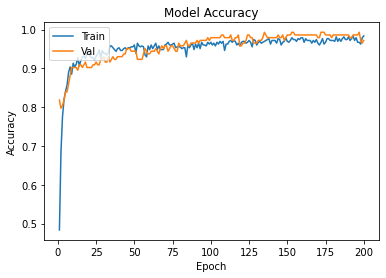

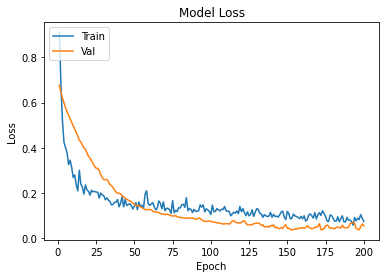

In [381]:
plot_learningCurve(history, epochs)